In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy import optimize

In [34]:
lam_0 = np.linspace(200e-9,10000e-9); # nanometer
c0 = 299792458;
freq = c0 / lam_0
h = 6.626e-34;
T = 5000;
k = 1.3806e-23;


B1 = 2 * h * freq ** 3 / c0 ** 2 * 1 / (np.exp(h * freq / k / T) - 1)
B2 = 2 * h * c0 / lam_0 ** 3 * 1 / (np.exp(h * c0 / lam_0 / k / T) - 1)

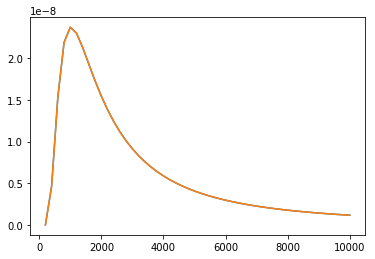

In [35]:
plt.plot(lam_0*1e9,B1)
plt.plot(lam_0*1e9,B2)

In [40]:
abs(B1-B2)<np.finfo(np.float32).eps

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

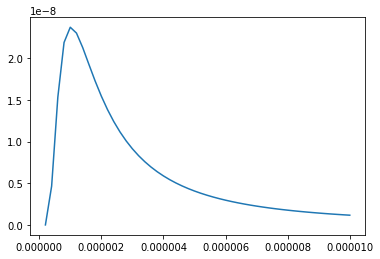

In [48]:
def lognorm(xin,A,B,mu,sigma):
    return A*1/xin * 1/sigma/np.sqrt(2*np.pi) * np.exp(-(np.log(xin-B) - mu)**2/2/sigma**2)

def radiator(wavelength,temperature):
    h  = const.h; # Planck constant
    c0 = const.c; # Speed of light
    k  = const.k; # Boltzmann constant
    return 2*h*c0/(wavelength**3) * (np.exp(h*c0/wavelength/k/T)-1)**(-1)

plt.plot(lam_0,radiator(lam_0,2000))
# popt, pcov = optimize.curve_fit(lognorm,wavelength,lamp,p0=(200,250,7,.6))
# print('A, B, mu, sigma:', popt)
# plt.plot(wavelength,lamp);
# plt.plot(wavelength,lognorm(wavelength, *popt));
# plt.title('Spectral Radiance');
# plt.xlabel('Wavelength (nm)');
# plt.ylabel('Spectral Radiance (W/m^2/sr/nm)');
# plt.legend(['Incandescent Bulb','Fit Curve']);

In [44]:
const.k

1.38064852e-23